In [1]:
%run setup.py

In [414]:
from scipy import interpolate

filenames = ['../mist/MIST_eep_feh{:04.0f}/{:07.0f}M.track.eep'.format(feh*100, mass*1e4) for feh in [ -0.5, 0., 0.5] for mass in np.arange(1.0, 2.3, 0.4)]


data = [[] for i in range(3)]  #{'radius':[], 'ratio':[], 'mass':[], 'feh':[]}
for filename in filenames[:]:
    mobj = se.MIST_EEP(filename)
    m = mobj.eeps
    
    rgb = (m['phase']==2) & (m['center_he4']>0.8) #& (10.0**m['log_R']<Rmax)
    heb = (m['phase']>=3) & (m['phase']<=5) & (m['center_he4']<0.93) &(m['nu_max']<260)
    Rmin = np.min(10.0**m['log_R'][heb]) if np.sum(heb)>0 else np.nan# 
    Rmax = np.max(10.0**m['log_R'][rgb]) if np.sum(rgb)>0 else np.nan # Rsun -> RGB_tip
    rgb = rgb & (10.0**m['log_R']>Rmin) & (10.0**m['log_R']<Rmax)
    heb = heb & (10.0**m['log_R']<Rmax)
    
    
    if (np.sum(agb)<5) or (np.sum(rgb)<5) or (Rmin>Rmax): 
        data[0].append(None)
        data[1].append(None)
        data[2].append(None)
    else:
        lifespan_rgb = np.max(m['star_age'][rgb]) - np.min(m['star_age'][rgb])
        lifespan_heb = np.max(m['star_age'][heb]) - np.min(m['star_age'][heb]) 
        
        dt = (lifespan_rgb+lifespan_heb) / 100000
        radius = np.linspace(Rmin, Rmax, 50)
        luminosity = np.linspace(np.min(10.0**m['log_L'][rgb|heb]), np.max(10.0**m['log_L'][rgb|heb]), 50)
        numax = np.logspace(np.log10(np.min(m['nu_max'][rgb|heb])), np.log10(np.max(m['nu_max'][rgb|heb])), 50, base=10)

        ysb = [radius, luminosity, numax]
        ys = [10.0**m['log_R'], 10.0**m['log_L'], m['nu_max']]
        for iy, y in enumerate(ys):
            x1 = m['star_age'][rgb]
            y1 = ys[iy][rgb]
            xnew1 = np.arange(x1.min(), x1.max(), dt)
            y_rgb = np.interp(xnew1, x1, y1)
            N_rgb, _  = np.histogram(y_rgb, bins=ysb[iy])

            x2 = m['star_age'][heb]
            y2 = ys[iy][heb]
            xnew2 = np.arange(x2.min(), x2.max(), dt)
            y_heb = np.interp(xnew2, x2, y2)
            N_heb, _ = np.histogram(y_heb, bins=ysb[iy])

            ratio = N_heb/(N_heb+N_rgb)
            var = (ysb[iy][1:]+ysb[iy][:-1])/2.

            feh = np.zeros(len(var)) + mobj.abun['[Fe/H]']
            mass = np.zeros(len(var)) + mobj.minit
            
            center_he4 = np.interp(var, np.sort(ys[iy][heb]), m['center_he4'][heb][np.argsort(ys[iy][heb])])
            ifclump = center_he4>0.01

            data[iy].append([var, ratio, mass, feh, ifclump])

Reading in: ../mist/MIST_eep_feh-050/0010000M.track.eep
Reading in: ../mist/MIST_eep_feh-050/0014000M.track.eep
Reading in: ../mist/MIST_eep_feh-050/0018000M.track.eep
Reading in: ../mist/MIST_eep_feh-050/0022000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0010000M.track.eep


/suphys/yali4742/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


Reading in: ../mist/MIST_eep_feh0000/0014000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0018000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0022000M.track.eep
Reading in: ../mist/MIST_eep_feh0050/0010000M.track.eep
Reading in: ../mist/MIST_eep_feh0050/0014000M.track.eep
Reading in: ../mist/MIST_eep_feh0050/0018000M.track.eep
Reading in: ../mist/MIST_eep_feh0050/0022000M.track.eep


Reading in: ../mist/MIST_eep_feh0000/0010000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0014000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0018000M.track.eep
Reading in: ../mist/MIST_eep_feh0000/0022000M.track.eep


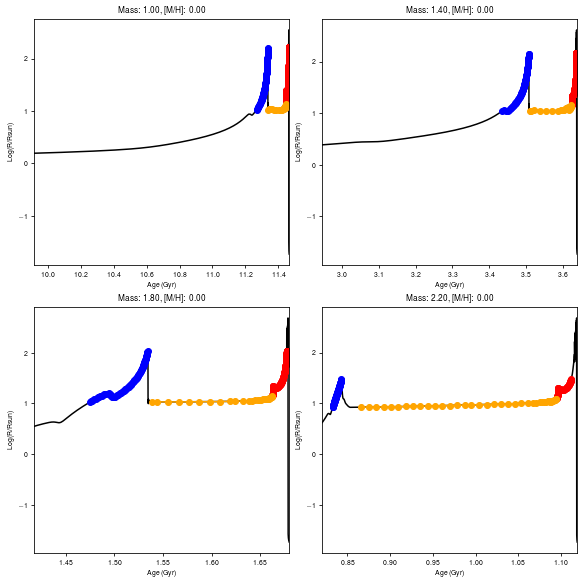

In [442]:
filenames = ['../mist/MIST_eep_feh{:04.0f}/{:07.0f}M.track.eep'.format(feh*100, mass*1e4) for feh in [0.0] for mass in np.arange(1.0, 2.3, 0.4)]

fig, axes = plt.subplots(figsize=[8,8], nrows=2, ncols=2, squeeze=False, constrained_layout=True)
axes = axes.reshape(-1)

for iax, ax in enumerate(axes):
    mobj = se.MIST_EEP(filenames[iax])
    m = mobj.eeps
    
    rgb = (m['phase']==2) & (m['center_he4']>0.8) #& (10.0**m['log_R']<Rmax)
    heb = (m['phase']>=3) & (m['phase']<=5) & (m['center_he4']<0.93) #&(m['nu_max']<260)
    Rmin = np.min(10.0**m['log_R'][heb]) if np.sum(heb)>0 else np.nan# 
    Rmax = np.max(10.0**m['log_R'][rgb]) if np.sum(rgb)>0 else np.nan # Rsun -> RGB_tip
    rgb = rgb & (10.0**m['log_R']>Rmin) & (10.0**m['log_R']<Rmax)
    heb = heb & (10.0**m['log_R']<Rmax)
#     print(Rmin, Rmax)

    clp = heb & (m['center_he4']>0.01) #& (m['delta_Pg']!=0)
    agb = heb & (m['center_he4']<=0.01) #& (m['delta_Pg']!=0)
    
    val = 'log_R'
    ax.plot(m['star_age']/1e9, m[val], 'k-')
    ax.set_xlim(left=np.min(m['star_age'][m['phase']==2]/1e9), right=np.max(m['star_age']/1e9))
    ax.plot(m['star_age'][rgb]/1e9, m[val][rgb], 'bo')
    ax.plot(m['star_age'][agb]/1e9, m[val][agb], 'ro')
    ax.plot(m['star_age'][clp]/1e9, m[val][clp], color='orange', marker='o')
    ax.set_title('Mass: {:.2f}, [M/H]: {:.2f}'.format(mobj.minit, mobj.abun['[Fe/H]']))
    
    ax.set_xlabel('Age (Gyr)')
    ax.set_ylabel('Log(R/Rsun)')
    
#     ax.set_yscale('log')
#     ax.set_ylim(bottom=0)

# plt.savefig('tracks.jpg', dpi=300)

In [419]:
# plt.figure()
# plt.plot(m['star_age'][clp]/1e9, m['delta_Pg'][clp], 'ko')
# plt.plot(m['star_age'][agb]/1e9, m['delta_Pg'][agb], 'r.')
# # plt.xscale('log')
# # plt.xlim(left=11.44)

# plt.figure()
# plt.plot(m['star_age'][clp]/1e9, m['log_R'][clp], 'ko')
# plt.plot(m['star_age'][agb]/1e9, m['log_R'][agb], 'r.')
# # plt.xscale('log')
# # plt.xlim(left=11.44)


# plt.figure()
# plt.plot(m['star_age'][clp]/1e9, m['nu_max'][clp], 'ko')
# plt.plot(m['star_age'][agb]/1e9, m['nu_max'][agb], 'r.')
# # plt.xscale('log')
# # plt.xlim(left=11.44)

In [242]:
plt.plot(radius, N_rgb, 'k.')
plt.plot(radius, N_agb, 'r.')
plt.figure()
plt.plot(radius, 1/ratio)

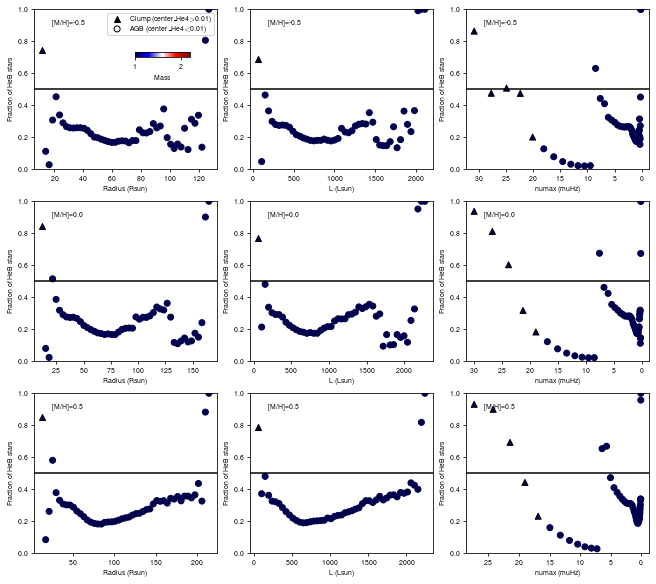

In [440]:
import matplotlib.colors

norm = matplotlib.colors.Normalize(vmin=1., vmax=2.2)
cmap = 'seismic'
fig, axes = plt.subplots(figsize=[9,8], nrows=3, ncols=3, squeeze=False, constrained_layout=True)

for irow in range(3):
    imass, Nmass = 0, 1
    for d in data[0][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        radius, ratio, mass, feh, ifclump = d
        axes[irow,0].scatter(radius[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,0].scatter(radius[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,0].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,0].transAxes)
    axes[irow,0].scatter([],[], marker='^', facecolor='k', edgecolor='k', label='Clump (center\_He4$>$0.01)')
    axes[irow,0].scatter([],[], marker='o', facecolor='none', edgecolor='k', label='AGB  (center\_He4$<$0.01)')
    
    for d in data[1][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        lum, ratio, mass, feh, ifclump = d
        axes[irow,1].scatter(lum[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,1].scatter(lum[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,1].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,1].transAxes)

    for d in data[2][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        numax, ratio, mass, feh, ifclump = d
        axes[irow,2].scatter(numax[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,2].scatter(numax[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,2].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,2].transAxes)

    for icol in range(3):
        axes[irow,icol].set_ylim(0, 1)
        axes[irow,icol].axhline(0.5, linestyle='-', c='k')
        axes[irow,icol].set_ylabel('Fraction of HeB stars')
    axes[0,0].legend(fontsize=fontsize)
    
    axes[irow,0].set_xlabel('Radius (Rsun)')
    axes[irow,1].set_xlabel('L (Lsun)')
    axes[irow,2].set_xlabel('numax (muHz)')
    axes[irow,2].set_xlim(axes[irow,2].get_xlim()[::-1])

cax = axes[0,0].inset_axes([0.55, 0.7, 0.3, 0.03], transform=axes[0,0].transAxes)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ax=axes[0,0], orientation='horizontal').set_label('Mass')

filename='lifetime_M1.0.jpg'
plt.savefig(filename, dpi=300)

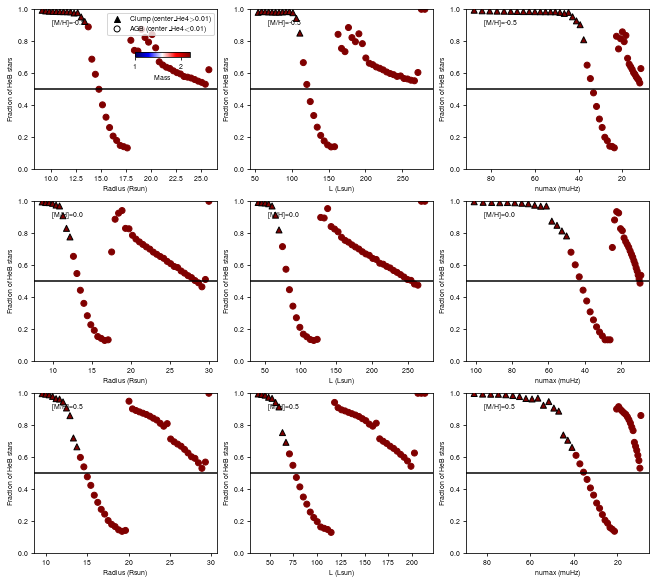

In [441]:
import matplotlib.colors

norm = matplotlib.colors.Normalize(vmin=1., vmax=2.2)
cmap = 'seismic'
fig, axes = plt.subplots(figsize=[9,8], nrows=3, ncols=3, squeeze=False, constrained_layout=True)

for irow in range(3):
    imass, Nmass = 3, 1
    for d in data[0][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        radius, ratio, mass, feh, ifclump = d
        axes[irow,0].scatter(radius[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,0].scatter(radius[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,0].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,0].transAxes)
    axes[irow,0].scatter([],[], marker='^', facecolor='k', edgecolor='k', label='Clump (center\_He4$>$0.01)')
    axes[irow,0].scatter([],[], marker='o', facecolor='none', edgecolor='k', label='AGB  (center\_He4$<$0.01)')
    
    for d in data[1][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        lum, ratio, mass, feh, ifclump = d
        axes[irow,1].scatter(lum[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,1].scatter(lum[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,1].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,1].transAxes)

    for d in data[2][(4*irow+imass):(4*irow+imass+Nmass)]:
        if d is None: continue
        numax, ratio, mass, feh, ifclump = d
        axes[irow,2].scatter(numax[ifclump], ratio[ifclump], c=mass[ifclump], cmap=cmap, norm=norm, marker='^', edgecolor='k',zorder=10)
        axes[irow,2].scatter(numax[~ifclump], ratio[~ifclump], c=mass[~ifclump], cmap=cmap, norm=norm, marker='o')
    axes[irow,2].text(0.1, 0.9, '[M/H]={:0.1f}'.format(np.median(feh)), transform=axes[irow,2].transAxes)

    for icol in range(3):
        axes[irow,icol].set_ylim(0, 1)
        axes[irow,icol].axhline(0.5, linestyle='-', c='k')
        axes[irow,icol].set_ylabel('Fraction of HeB stars')
    axes[0,0].legend(fontsize=fontsize)
    
    axes[irow,0].set_xlabel('Radius (Rsun)')
    axes[irow,1].set_xlabel('L (Lsun)')
    axes[irow,2].set_xlabel('numax (muHz)')
    axes[irow,2].set_xlim(axes[irow,2].get_xlim()[::-1])

cax = axes[0,0].inset_axes([0.55, 0.7, 0.3, 0.03], transform=axes[0,0].transAxes)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ax=axes[0,0], orientation='horizontal').set_label('Mass')

filename='lifetime_M2.2.jpg'
plt.savefig(filename, dpi=300)